# Projet bloc 4: Disaster Tweets

## Description du concours

Twitter est devenu un canal de communication important en cas d'urgence.
L'omniprésence des smartphones permet aux gens d'annoncer une urgence qu'ils observent en temps réel. Pour cette raison, davantage d'agences sont intéressées par la surveillance programmatique de Twitter (c'est-à-dire les organisations de secours en cas de catastrophe et les agences de presse).

Mais, il n'est pas toujours clair si les mots d'une personne annoncent réellement une catastrophe. 

**Prenons cet exemple** : 
 
L'auteur utilise explicitement le mot "ABLAZE" mais c'est une métaphore dans ce contexte. Son utilisation est claire pour un être humain surtout, avec l'aide visuelle. Mais c'est moins clair pour une machine.

Dans ce concours, vous êtes mis au défi de créer un modèle d'apprentissage automatique qui prédit quels Tweets concernent de véritables catastrophes et lesquels ne le sont pas. 

In [1]:
!pip install spacy -q

In [2]:
import spacy

In [3]:
!python -m spacy download en -q

2022-11-06 13:16:53.066659: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-06 13:16:53.066709: E tensorflow/stream_executor/cuda/cuda_driver.cc:313] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-06 13:16:53.066751: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-vanessamarieclaire-40gmail-2ecom): /proc/driver/nvidia/version does not exist
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import en_core_web_sm
nlp1 = en_core_web_sm.load()

/opt/conda/lib/python3.8/site-packages/spacy/language.py:1895: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  warnings.warn(


In [5]:
import pandas as pd

train = pd.read_csv("train.csv")
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


## 1 ) Modélisation sur le train

###  a ) Vérification des valeurs manquantes dans la dataset

In [6]:
dico_isnull = {c : len(train[train[c].isnull()== True]) for c in train.columns}
dico_isnull

{'id': 0, 'keyword': 61, 'location': 2533, 'text': 0, 'target': 0}

### b ) Compter le nombre de mot dans la phrase

In [7]:
train["number_of_words"] = train["text"].apply(lambda x: len(x))

In [8]:
train

,id,keyword,location,text,target,number_of_words
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


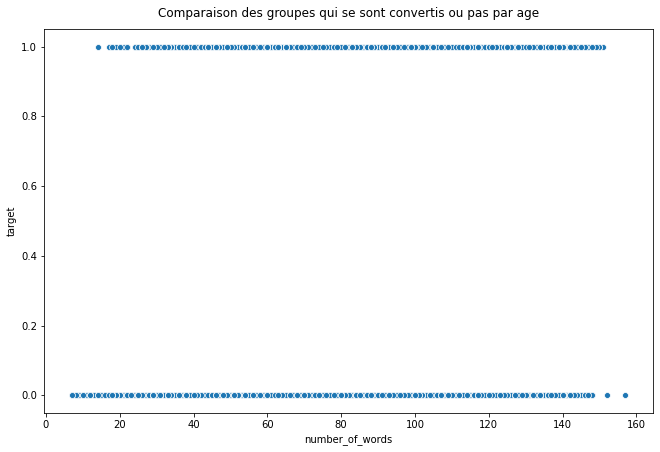

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (24, 24))

plt.subplot(3,2,1)

plt.title("Comparaison des groupes qui se sont convertis ou pas par age", pad = 12)

sns.scatterplot(data = train, x = "number_of_words", y = "target")



Conclusion : On ne voit pas de grande différence entre le nombre de mots utilisé entre les tweets qui décrivent une catastrophe pas. Donc on exploite pas pour le deep learning.

### c) Preprocessing de la data train

In [10]:
import re

# Cleaning colonne text

train['text_clean'] = train['text'].str.replace(r"[^A-Za-z0-9 ]+", " ") # on remplace tous les éléments non alpha numérique par " "
train['text_clean'] = train['text'].fillna(' ').apply(lambda x: x.lower()) # on remplace tous les nan par " " et transforme tous le texte en miniscule.
train['text_clean'] =train['text_clean']. apply(lambda x: re.sub(r" amp ",r" ",x))
train['text_clean'] =train['text_clean']. apply(lambda x: re.sub(r"amp",r" ",x))
train['text_clean'] =train['text_clean']. apply(lambda x: re.sub(r"û",r" ",x))
train['text_clean'] =train['text_clean']. apply(lambda x: re.sub(r"_",r" ",x))
train['text_clean'] =train['text_clean']. apply(lambda x: re.sub(r"go",r" ",x))
train['text_clean'] =train['text_clean'].str.replace(r"< t | s | co | t | m ", " ")
train['text_clean'] =train['text_clean']. apply(lambda x: re.sub(r"http.+.",r" ", x))
train['text_clean'] = train['text_clean'].str.replace(r"news", " ")
train['text_clean'] = train['text_clean'].str.replace(r"new", " ")


# Cleaning colonne keyword

train['keyword_clean'] = train['keyword'].str.replace(r"[^A-Za-z0-9 ]+", " ") # on remplace tous les éléments non alpha numérique par " "
train['keyword_clean'] = train['keyword'].fillna(' ').apply(lambda x: x.lower())



In [11]:
train

,id,keyword,location,text,target,number_of_words,text_clean,keyword_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,our deeds are the reason of this #earthquake m...,
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask. canada,
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,all residents asked to 'shelter in place' are ...,
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"13,000 people receive #wildfires evacuation or...",
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,just sent this photo from ruby #alaska as smo...,
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,two giant cranes holding a bridge collapse int...,
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,@aria ahrary @thetawniest the out of control w...,
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,m1.94 [01:04 utc]?5km of volcano hawaii.,
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,police investigating after an e-bike collided ...,


#### c-1) Traitement du texte avec spacy

In [12]:
nlp1.Defaults.stop_words |= {"people","time"} #ajout de deux mots trop fréquents dans les deux classes dans le stop_words

In [13]:
from spacy.lang.en.stop_words import STOP_WORDS

# tokenization

train['text_tokenized'] = train['text_clean'].fillna('').apply(lambda x: nlp1(x))


# remove stop-words

train['text_tokenized']= train['text_tokenized'].apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])

train['nlp_ready'] =[' '.join(train['text_tokenized'].iloc[i]) for i in range(len(train['text_tokenized']))]

In [14]:
# tokenization

train['keyword_tokenized'] = train['keyword_clean'].fillna('').apply(lambda x: nlp1(x))


# remove stop-words

train['keyword_tokenized']= train['keyword_tokenized'].apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])


train['keyword_nlp_ready'] =[' '.join(train['keyword_tokenized'].iloc[i]) for i in range(len(train['keyword_tokenized']))] 



In [15]:
train

,id,keyword,location,text,target,number_of_words,text_clean,keyword_clean,text_tokenized,nlp_ready,keyword_tokenized,keyword_nlp_ready
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,our deeds are the reason of this #earthquake m...,,"[deed, reason, #, earthquake, allah, forgive]",deed reason # earthquake allah forgive,[ ],
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask. canada,,"[forest, fire, near, la, ronge, sask, ., canada]",forest fire near la ronge sask . canada,[ ],
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,all residents asked to 'shelter in place' are ...,,"[resident, ask, ', shelter, place, ', notify, ...",resident ask ' shelter place ' notify officer ...,[ ],
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,"13,000 people receive #wildfires evacuation or...",,"[13,000, receive, #, wildfire, evacuation, ord...","13,000 receive # wildfire evacuation order cal...",[ ],
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,just sent this photo from ruby #alaska as smo...,,"[ , send, photo, ruby, #, alaska, smoke, #, wi...",send photo ruby # alaska smoke # wildfire po...,[ ],
...,...,...,...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,two giant cranes holding a bridge collapse int...,,"[giant, crane, hold, bridge, collapse, nearby,...",giant crane hold bridge collapse nearby home,[ ],
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,@aria ahrary @thetawniest the out of control w...,,"[@aria, ahrary, @thetawni, control, wild, fire...",@aria ahrary @thetawni control wild fire calif...,[ ],
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,m1.94 [01:04 utc]?5km of volcano hawaii.,,"[m1.94, [, 01:04, utc]?5, km, volcano, hawaii,...",m1.94 [ 01:04 utc]?5 km volcano hawaii .,[ ],
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,police investigating after an e-bike collided ...,,"[police, investigate, e, -, bike, collide, car...",police investigate e - bike collide car little...,[ ],


#### c-2) Visualisation du texte traité par spacy à l'aide du module wordcloud

In [16]:
train[['nlp_ready','keyword_nlp_ready']]




,nlp_ready,keyword_nlp_ready
0,deed reason # earthquake allah forgive,
1,forest fire near la ronge sask . canada,
2,resident ask ' shelter place ' notify officer ...,
3,"13,000 receive # wildfire evacuation order cal...",
4,send photo ruby # alaska smoke # wildfire po...,
...,...,...
7608,giant crane hold bridge collapse nearby home,
7609,@aria ahrary @thetawni control wild fire calif...,
7610,m1.94 [ 01:04 utc]?5 km volcano hawaii .,
7611,police investigate e - bike collide car little...,


#### Visualisation de la colonne "text" traité avec spacy nommée"nlp_ready"

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(smooth_idf=True,ngram_range = (1,1))
X = vectorizer.fit_transform(train['nlp_ready'])

X_dense_1 = X.toarray()

X_dense_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
# Create a tf-idf matrix for each token and each document

data_Xdense_1 = pd.DataFrame(X_dense_1,columns=[x for x in vectorizer.get_feature_names()])

data_Xdense_1     

,00,000,0000,00end,00pm,01,02,02pm,03,030,...,ïwhen,ïyou,ò800000,òthe,òåêcnbc,óher,ókody,ónegligence,ótech,ówe
0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.467267,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.000000,0.0,0.0,0.0,0.339619,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data_Xdense_1["labels"] = train.target.tolist()

In [20]:
data_Xdense_1.labels

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: labels, Length: 7613, dtype: int64

In [21]:
!pip install wordcloud -q

In [22]:
# Instanciate WordCloud 
import wordcloud

def visualization_of_words_2(table):
    index = table.index
    text_list = train.nlp_ready[table.index].values
    text= " ".join(text_list)
    wd = wordcloud.WordCloud()
    cloud = wd.generate(text)
    plt.imshow(cloud)
    

In [23]:
X0 = data_Xdense_1[data_Xdense_1.labels == 0]

In [24]:
X1 =data_Xdense_1[data_Xdense_1.labels == 1]

In [25]:
X0

,00,000,0000,00end,00pm,01,02,02pm,03,030,...,ïyou,ò800000,òthe,òåêcnbc,óher,ókody,ónegligence,ótech,ówe,labels
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


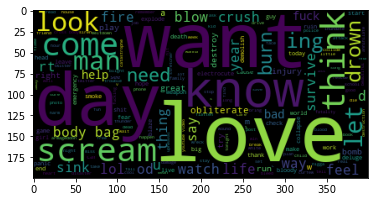

In [26]:
visualization_of_words_2(X0) # classe 0 : tweet qui annonce pas de catastrophe

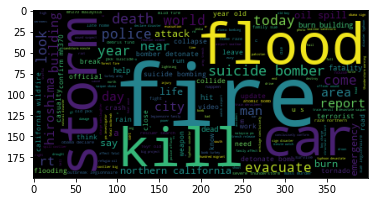

In [27]:
visualization_of_words_2(X1) # classe 1 : tweet qui annonce une catastrophe

#### Visualisation de la colonne "keyword" traité avec spacy nommée "keyword_nlp_ready"

In [28]:
def visualization_of_words_3(table):
    index = table.index
    text_list = train.keyword_nlp_ready[table.index].values
    text= " ".join(text_list)
    wd = wordcloud.WordCloud()
    cloud = wd.generate(text)
    plt.imshow(cloud)
    

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(smooth_idf=True,ngram_range = (1,1))
X2 = vectorizer.fit_transform(train['keyword_nlp_ready'])

X_dense_2 = X2.toarray()

X_dense_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# Create a tf-idf matrix for each token and each document

data_Xdense_2 = pd.DataFrame(X_dense_2,columns=[x for x in vectorizer.get_feature_names()])

data_Xdense_2     

,20accident,20bag,20bagge,20bang,20bomb,20bombe,20bomber,20building,20burne,20collapse,...,volcano,war,weapon,whirlwind,wild,wildfire,windstorm,wound,wreck,wreckage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
data_Xdense_2["labels"] = train.target.tolist()

In [32]:
X0_bis = data_Xdense_2[data_Xdense_2.labels == 0] # classe 0 : tweet qui annonce pas de catastrophe

In [33]:
X1_bis =data_Xdense_2[data_Xdense_2.labels == 1] # classe 1 : tweet qui annonce une catastrophe

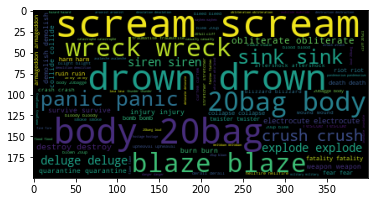

In [34]:
visualization_of_words_3(X0_bis) # classe 0 : tweet qui annonce pas de catastrophe

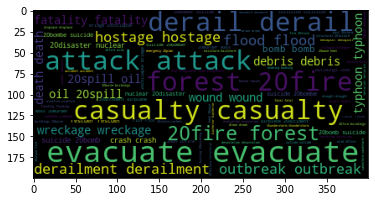

In [35]:
visualization_of_words_3(X1_bis) # classe 1 : tweet qui annonce une catastrophe

#### 3-c) Suite preprocessing avec tensorFlow

In [36]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [37]:
# Import Tensorflow & Pathlib librairies
import tensorflow as tf 
import pathlib 
import pandas as pd 
import os
import io
import warnings

In [38]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=499)

In [39]:
tokenizer.fit_on_texts(train['nlp_ready'])
train["nlp_ready_format_encoded"] = tokenizer.texts_to_sequences(train['nlp_ready']) # encodage du texte.

In [40]:
tokenizer_k = tf.keras.preprocessing.text.Tokenizer(num_words=499)

tokenizer_k.fit_on_texts(train['keyword_nlp_ready'])
train["nlp_keyword_format_encoded"] = tokenizer_k.texts_to_sequences(train['keyword_nlp_ready']) # encodage du texte

In [41]:
train["len_review_format"] = train["nlp_ready_format_encoded"].apply(lambda x: len(x)) # comptage du nombre de chiffre ou d'élement encodé dans la liste.

In [42]:
train["len_review_k_format"] = train["nlp_keyword_format_encoded"].apply(lambda x: len(x))  # comptage du nombre de chiffre ou d'élement encodé dans la liste.

In [43]:
train = train[train.len_review_format != 0]
train = train[train.len_review_k_format != 0]
train

,id,keyword,location,text,target,number_of_words,text_clean,keyword_clean,text_tokenized,nlp_ready,keyword_tokenized,keyword_nlp_ready,nlp_ready_format_encoded,nlp_keyword_format_encoded,len_review_format,len_review_k_format
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,@bbcmtd wholesale markets ablaze,ablaze,"[@bbcmtd, wholesale, market, ablaze, ]",@bbcmtd wholesale market ablaze,[ablaze],ablaze,"[312, 485]",[86],2,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67,we always try to bring the heavy. #metal #rt,ablaze,"[try, bring, heavy, ., #, metal, #, rt, ]",try bring heavy . # metal # rt,[ablaze],ablaze,"[138, 300, 47]",[86],3,1
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,#africanbaze: breaking :nigeria flag set abla...,ablaze,"[#, africanbaze, :, break, , :, nigeria, flag...",# africanbaze : break : nigeria flag set abl...,[ablaze],ablaze,"[103, 146, 485]",[86],3,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,crying out for more! set me ablaze,ablaze,"[cry, !, set, ablaze]",cry ! set ablaze,[ablaze],ablaze,"[146, 485]",[86],2,1
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76,on plus side look at the sky last night it was...,ablaze,"[plus, look, sky, night, ablaze, ]",plus look sky night ablaze,[ablaze],ablaze,"[19, 201, 485]",[86],3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7578,10830,wrecked,NaN,@jt_ruff23 @cameronhacker and I wrecked you both,0,48,@jt ruff23 @cameronhacker and i wrecked you both,wrecked,"[@jt, ruff23, @cameronhacker, wreck]",@jt ruff23 @cameronhacker wreck,[wreck],wreck,[60],[11],1,1
7579,10831,wrecked,"Vancouver, Canada",Three days off from work and they've pretty mu...,0,107,three days off from work and they've pretty mu...,wrecked,"[day, work, pretty, wreck, hahaha, shoutout, f...",day work pretty wreck hahaha shoutout family,[wreck],wreck,"[18, 53, 60, 29]",[11],4,1
7580,10832,wrecked,London,#FX #forex #trading Cramer: Iger's 3 words tha...,0,93,#fx #forex #trading cramer: iger's 3 words tha...,wrecked,"[#, fx, #, forex, #, trading, cramer, :, iger,...",# fx # forex # trading cramer : iger 3 word wr...,[wreck],wreck,"[22, 351, 60, 369]",[11],4,1
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,104,@engineshed great atmosphere at the british li...,wrecked,"[@engineshe, great, atmosphere, british, lion,...",@engineshe great atmosphere british lion gig t...,[wreck],wreck,"[109, 277, 60]",[11],3,1


In [44]:
train_pad_text = tf.keras.preprocessing.sequence.pad_sequences(train["nlp_ready_format_encoded"], padding="pre")

train_pad_key = tf.keras.preprocessing.sequence.pad_sequences(train["nlp_keyword_format_encoded"], padding="pre")



In [45]:
train["text_pad"] = train_pad_text.tolist()


In [46]:
train_pad_text

array([[  0,   0,   0, ...,   0, 312, 485],
       [  0,   0,   0, ..., 138, 300,  47],
       [  0,   0,   0, ..., 103, 146, 485],
       ...,
       [  0,   0,   0, ..., 351,  60, 369],
       [  0,   0,   0, ..., 109, 277,  60],
       [  0,   0,   0, ..., 351,  60, 369]], dtype=int32)

In [47]:
train["key_pad"]=train_pad_key.tolist()

## 2) Construction de notre modèle de deep leaning

In [48]:
import numpy as np

In [49]:
np.concatenate((train_pad_text,train_pad_key),axis= 1)

array([[ 0,  0,  0, ...,  0,  0, 86],
       [ 0,  0,  0, ...,  0,  0, 86],
       [ 0,  0,  0, ...,  0,  0, 86],
       ...,
       [ 0,  0,  0, ...,  0,  0, 11],
       [ 0,  0,  0, ...,  0,  0, 11],
       [ 0,  0,  0, ...,  0,  0, 11]], dtype=int32)

###  a) Séparation des données en train/validation

In [50]:
X = np.concatenate((train_pad_text,train_pad_key),axis= 1)
y = train.target.values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,
                                                          y,
                                                          test_size=0.3,
                                                          stratify=y)


In [51]:
len(X_train)

5140

In [52]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))


validation = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [53]:
# shuffle and batch
train_batch = train.shuffle(len(X_train)).batch(64)
validation_batch = validation.shuffle(len(X_val)).batch(64)# mettre à 64

In [54]:
vocab_size = len(tokenizer.word_index)
vocab_size

14294

### b) Construction de notre modèle de deep learning

In [61]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM,GlobalAveragePooling1D,Dropout
from tensorflow.keras.layers import ReLU, LeakyReLU, ELU,Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2,l1

vocab_size = len(tokenizer.word_index)
model_lstm1 = tf.keras.Sequential([
                  Embedding(vocab_size+1, 8, input_shape=[X_train.shape[1],],name="embedding"),
                  LSTM(units=64, return_sequences=True), # maintains the sequential nature
                  Dropout(0.7),
                  LSTM(units=32, return_sequences=True),
                  Dropout(0.5),
                  LSTM(units=16, return_sequences=False),# returns the last output
                  Dropout(0.5),
                  Dense(256, activation='relu'),
                  Dropout(0.2),
                  Dense(8, activation='relu'),
                  Dropout(0.2),

                  Dense(1, activation="sigmoid")
])

model_lstm1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             114360    
_________________________________________________________________
lstm_18 (LSTM)               (None, 20, 64)            18688     
_________________________________________________________________
dropout_30 (Dropout)         (None, 20, 64)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 20, 32)            12416     
_________________________________________________________________
dropout_31 (Dropout)         (None, 20, 32)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dropout_32 (Dropout)         (None, 16)               

In [108]:
model_lstm1.compile(optimizer=tf.keras.optimizers.Adam(0.000075),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [109]:
checkpoint_path = "training_version_lstm5b/cp-{epoch:01}.ckpt" # the path where checkpoint files
# will be stored


cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    save_freq=81)

In [110]:
model_lstm1.fit(
    train_batch,
    validation_data=validation_batch,
    epochs=18,callbacks=[cp_callback])

Epoch 1/18
80/81 [============================>.] - ETA: 0s - loss: 0.6921 - accuracy: 0.5611
Epoch 00001: saving model to training_version_lstm5b/cp-1.ckpt
81/81 [==============================] - 6s 76ms/step - loss: 0.6922 - accuracy: 0.5605 - val_loss: 0.6906 - val_accuracy: 0.5676
Epoch 2/18
80/81 [============================>.] - ETA: 0s - loss: 0.6892 - accuracy: 0.5672
Epoch 00002: saving model to training_version_lstm5b/cp-2.ckpt
81/81 [==============================] - 4s 50ms/step - loss: 0.6891 - accuracy: 0.5677 - val_loss: 0.6867 - val_accuracy: 0.5676
Epoch 3/18
80/81 [============================>.] - ETA: 0s - loss: 0.6825 - accuracy: 0.5680
Epoch 00003: saving model to training_version_lstm5b/cp-3.ckpt
81/81 [==============================] - 4s 50ms/step - loss: 0.6826 - accuracy: 0.5677 - val_loss: 0.6810 - val_accuracy: 0.5676
Epoch 4/18
79/81 [============================>.] - ETA: 0s - loss: 0.6828 - accuracy: 0.5670
Epoch 00004: saving model to training_version

### c) Visualisation de l'évolution du modèle 

In [62]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [111]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio 
pio.renderers.default = "iframe_connected"
from plotly.subplots import make_subplots

from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

history = model_lstm1.history
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show()

In [112]:
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

history = model_lstm1.history
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history.history["val_accuracy"],
                          name="Validation accuracy",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'    
)
fig.show()

### d) Sélection du meilleur poids du modèle

In [66]:
model_lstm1.load_weights("training_version_lstm5b/cp-15.ckpt")

## 3) Application de notre modèle au test

In [121]:
test= pd.read_csv("test.csv")
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


### a) Preprocessing de la data test

In [122]:
import re

test['text_clean'] = test['text'].str.replace(r"[^A-Za-z0-9 ]+", " ") # on remplace tous les éléments non alpha numérique par ""
test['text_clean'] = test['text_clean'].fillna(' ').apply(lambda x: x.lower())

test['text_clean'] =test['text_clean']. apply(lambda x: re.sub(r" amp ",r" ",x))
test['text_clean'] =test['text_clean']. apply(lambda x: re.sub(r"amp",r" ",x))
test['text_clean'] =test['text_clean']. apply(lambda x: re.sub(r"û",r" ",x))
test['text_clean'] =test['text_clean']. apply(lambda x: re.sub(r"_",r" ",x))
test['text_clean'] =test['text_clean']. apply(lambda x: re.sub(r"go",r" ",x))

test['text_clean'] =test['text_clean'].str.replace(r"< t | s | co | t | m ", " ")
test['text_clean'] =test['text_clean']. apply(lambda x: re.sub(r"http.+.",r" ", x))
test['text_clean'] = test['text_clean'].str.replace(r"news", " ")
test['text_clean'] = test['text_clean'].str.replace(r"new", " ")



test['keyword_clean'] = test['keyword'].str.replace(r"[^A-Za-z0-9 ]+", " ") # on remplace tous les éléments non alpha numérique par ""
test['keyword_clean'] = test['keyword_clean'].fillna(' ').apply(lambda x: x.lower())





from spacy.lang.en.stop_words import STOP_WORDS

# tokenization


test['text_tokenized'] = test['text_clean'].fillna('').apply(lambda x: nlp1(x))
test['keyword_tokenized'] = test['keyword_clean'].fillna('').apply(lambda x: nlp1(x))


# remove stop-words

test['text_tokenized']= test['text_tokenized'].apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])

test['keyword_tokenized']= test['keyword_tokenized'].apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])



test['nlp_ready'] =[' '.join(test['text_tokenized'].iloc[i]) for i in range(len(test['text_tokenized']))]
test['keyword_nlp_ready'] =[' '.join(test['keyword_tokenized'].iloc[i]) for i in range(len(test['text_tokenized']))]







In [123]:
test

,id,keyword,location,text,text_clean,keyword_clean,text_tokenized,keyword_tokenized,nlp_ready,keyword_nlp_ready
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash,,"[happen, terrible, car, crash]",[ ],happen terrible car crash,
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities s...,,"[hear, , earthquake, different, city, , stay...",[ ],hear earthquake different city stay safe,
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are...,,"[forest, fire, spot, pond, , geese, flee, str...",[ ],forest fire spot pond geese flee street save,
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,,"[apocalypse, lighting, , spokane, , wildfire]",[ ],apocalypse lighting spokane wildfire,
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan,,"[typhoon, soudelor, kill, 28, china, taiwan]",[ ],typhoon soudelor kill 28 china taiwan,
...,...,...,...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastene...,,"[earthquake, safety, los, angeles, , safety,...",[ ],earthquake safety los angeles safety fasten...,
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm in ri worse than last hurricane my city...,,"[storm, ri, bad, hurricane, , city, 3others, ...",[ ],storm ri bad hurricane city 3others hard hit...,
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment in chica,,"[green, line, derailment, chica, ]",[ ],green line derailment chica,
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issues hazardous weather outlook hwo,,"[meg, issue, hazardous, weather, outlook, , h...",[ ],meg issue hazardous weather outlook hwo,


In [124]:
test["nlp_ready_format_encoded"] = tokenizer.texts_to_sequences(test['nlp_ready']) # Encodage du texte


test["len_text"] = test["nlp_ready_format_encoded"].apply(lambda x: len(x)) # comptage du nombre d'élément encodé dans la liste


test

,id,keyword,location,text,text_clean,keyword_clean,text_tokenized,keyword_tokenized,nlp_ready,keyword_nlp_ready,nlp_ready_format_encoded,len_text
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash,,"[happen, terrible, car, crash]",[ ],happen terrible car crash,,"[188, 41, 14]",3
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities s...,,"[hear, , earthquake, different, city, , stay...",[ ],hear earthquake different city stay safe,,"[134, 252, 130, 366]",4
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are...,,"[forest, fire, spot, pond, , geese, flee, str...",[ ],forest fire spot pond geese flee street save,,"[137, 3, 422, 98]",4
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,,"[apocalypse, lighting, , spokane, , wildfire]",[ ],apocalypse lighting spokane wildfire,,"[383, 84]",2
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan,,"[typhoon, soudelor, kill, 28, china, taiwan]",[ ],typhoon soudelor kill 28 china taiwan,,"[171, 8, 397]",3
...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastene...,,"[earthquake, safety, los, angeles, , safety,...",[ ],earthquake safety los angeles safety fasten...,,[252],1
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm in ri worse than last hurricane my city...,,"[storm, ri, bad, hurricane, , city, 3others, ...",[ ],storm ri bad hurricane city 3others hard hit...,,"[28, 89, 235, 130, 139, 19, 2, 9, 414]",9
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment in chica,,"[green, line, derailment, chica, ]",[ ],green line derailment chica,,[309],1
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issues hazardous weather outlook hwo,,"[meg, issue, hazardous, weather, outlook, , h...",[ ],meg issue hazardous weather outlook hwo,,"[158, 443, 228]",3


In [125]:
test["nlp_keyword_format_encoded"] = tokenizer_k.texts_to_sequences(test['keyword_nlp_ready'])  # Encodage du texte


test["len_keyword"] = test["nlp_keyword_format_encoded"].apply(lambda x: len(x))  # comptage du nombre d'élément encodé dans la liste


test

,id,keyword,location,text,text_clean,keyword_clean,text_tokenized,keyword_tokenized,nlp_ready,keyword_nlp_ready,nlp_ready_format_encoded,len_text,nlp_keyword_format_encoded,len_keyword
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash,,"[happen, terrible, car, crash]",[ ],happen terrible car crash,,"[188, 41, 14]",3,[],0
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities s...,,"[hear, , earthquake, different, city, , stay...",[ ],hear earthquake different city stay safe,,"[134, 252, 130, 366]",4,[],0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are...,,"[forest, fire, spot, pond, , geese, flee, str...",[ ],forest fire spot pond geese flee street save,,"[137, 3, 422, 98]",4,[],0
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,,"[apocalypse, lighting, , spokane, , wildfire]",[ ],apocalypse lighting spokane wildfire,,"[383, 84]",2,[],0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills 28 in china and taiwan,,"[typhoon, soudelor, kill, 28, china, taiwan]",[ ],typhoon soudelor kill 28 china taiwan,,"[171, 8, 397]",3,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,earthquake safety los angeles safety fastene...,,"[earthquake, safety, los, angeles, , safety,...",[ ],earthquake safety los angeles safety fasten...,,[252],1,[],0
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,storm in ri worse than last hurricane my city...,,"[storm, ri, bad, hurricane, , city, 3others, ...",[ ],storm ri bad hurricane city 3others hard hit...,,"[28, 89, 235, 130, 139, 19, 2, 9, 414]",9,[],0
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,green line derailment in chica,,"[green, line, derailment, chica, ]",[ ],green line derailment chica,,[309],1,[],0
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,meg issues hazardous weather outlook hwo,,"[meg, issue, hazardous, weather, outlook, , h...",[ ],meg issue hazardous weather outlook hwo,,"[158, 443, 228]",3,[],0


In [126]:
test = test[test.len_text != 0]
test = test[test.len_keyword != 0]
test

,id,keyword,location,text,text_clean,keyword_clean,text_tokenized,keyword_tokenized,nlp_ready,keyword_nlp_ready,nlp_ready_format_encoded,len_text,nlp_keyword_format_encoded,len_keyword
15,46,ablaze,London,Birmingham Wholesale Market is ablaze BBC News...,birmingham wholesale market is ablaze bbc ...,ablaze,"[birmingham, wholesale, market, ablaze, bbc, ...",[ablaze],birmingham wholesale market ablaze bbc fi...,ablaze,"[312, 485, 3, 103, 312]",5,[86],1
16,47,ablaze,Niall's place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ...,sunkxssedharry will you wear shorts for race ...,ablaze,"[ , sunkxssedharry, wear, short, race, ablaze, ]",[ablaze],sunkxssedharry wear short race ablaze,ablaze,[485],1,[86],1
17,51,ablaze,NIGERIA,#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriag...,previouslyondoyintv toke makinwa marriage cr...,ablaze,"[ , previouslyondoyintv, , toke, makinwa, mar...",[ablaze],previouslyondoyintv toke makinwa marriage ...,ablaze,"[146, 367, 485]",3,[86],1
18,58,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,check these out,ablaze,"[check, ]",[ablaze],check,ablaze,[202],1,[86],1
19,60,ablaze,"Los Angeles, Califnordia",PSA: IÛªm splitting my personalities.\n\n?? t...,psa i splitting my personalities techies fol...,ablaze,"[psa, , split, personality, , techie, follow...",[ablaze],psa split personality techie follow abla...,ablaze,"[291, 485, 291, 485]",4,[86],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,10806,wrecked,Seattle Washington,RT CNBC '3 words from Disney CEO Bob Iger wrec...,rt cnbc 3 words from disney ceo bob iger wrec...,wrecked,"[rt, cnbc, , 3, word, disney, ceo, bob, iger,...",[wreck],rt cnbc 3 word disney ceo bob iger wreck dis...,wreck,"[47, 22, 351, 60, 369, 42]",6,[11],1
3248,10807,wrecked,Acey mountain islanddåÇTorontoåÈ,Smackdown tyme this should put me in a good mo...,smackdown tyme this should put me in a od moo...,wrecked,"[smackdown, tyme, , od, mood, , wreck, smh]",[wreck],smackdown tyme od mood wreck smh,wreck,"[65, 60]",2,[11],1
3249,10816,wrecked,los angeles,@thrillhho jsyk I haven't stopped thinking abt...,thrillhho jsyk i haven stopped thinking abt r...,wrecked,"[ , thrillhho, jsyk, haven, stop, think, abt, ...",[wreck],thrillhho jsyk haven stop think abt remus sl...,wreck,"[126, 30, 18, 60]",4,[11],1
3250,10820,wrecked,"Brussels, Belgium",@stighefootball Begovic has been garbage. He g...,stighefootball be vic has been garbage he w...,wrecked,"[ , stighefootball, vic, garbage, , , wreck,...",[wreck],stighefootball vic garbage wreck red bul...,wreck,"[60, 292, 470]",3,[11],1


In [127]:
test_pad_text = tf.keras.preprocessing.sequence.pad_sequences(test["nlp_ready_format_encoded"], padding="pre")

test_pad_key = tf.keras.preprocessing.sequence.pad_sequences(test["nlp_keyword_format_encoded"], padding="pre")



### b) Prédiction

In [128]:
pred = model_lstm1.predict(np.concatenate((test_pad_text,test_pad_key),axis= 1))
pred

array([[0.58965504],
       [0.26659718],
       [0.34335876],
       ...,
       [0.24056457],
       [0.29506937],
       [0.2830851 ]], dtype=float32)

In [129]:
test["probabilite_prediction"]=pred

In [130]:
def prediction(x):
    if x > 0.50:
        x = 1
    else: 
        x=0
    return x

In [131]:
pred_final2 =test["probabilite_prediction"].apply(lambda x: prediction(x))
pred_final2

15      1
16      0
17      0
18      0
19      0
       ..
3247    0
3248    0
3249    0
3250    0
3251    0
Name: probabilite_prediction, Length: 3084, dtype: int64

In [132]:
test["target"] = pred_final2

#### Répartition des classes de la target

In [149]:
test.target.value_counts()

0    2152
1     932
Name: target, dtype: int64

In [148]:
test[test.target == 1]

,id,keyword,location,text,text_clean,keyword_clean,text_tokenized,keyword_tokenized,nlp_ready,keyword_nlp_ready,nlp_ready_format_encoded,len_text,nlp_keyword_format_encoded,len_keyword,probabilite_prediction,target
15,46,ablaze,London,Birmingham Wholesale Market is ablaze BBC News...,birmingham wholesale market is ablaze bbc ...,ablaze,"[birmingham, wholesale, market, ablaze, bbc, ...",[ablaze],birmingham wholesale market ablaze bbc fi...,ablaze,"[312, 485, 3, 103, 312]",5,[86],1,0.589655,1
23,75,ablaze,India,Rape victim dies as she sets herself ablaze: A...,rape victim dies as she sets herself ablaze a...,ablaze,"[rape, victim, die, set, ablaze, , 16, year, ...",[ablaze],rape victim die set ablaze 16 year old girl ...,ablaze,"[81, 146, 485, 463, 7, 62, 191, 81, 6, 68, 146...",12,[86],1,0.906148,1
25,87,ablaze,"scarborough, ontario",@CTVToronto the bins in front of the field by ...,ctvtoronto the bins in front of the field by ...,ablaze,"[ , ctvtoronto, bin, field, house, wer, set, a...",[ablaze],ctvtoronto bin field house wer set ablaze da...,ablaze,"[135, 146, 485, 18, 165, 410]",6,[86],1,0.758824,1
27,90,ablaze,"121 N La Salle St, Suite 500",'Burning Rahm': Let's hope City Hall builds a ...,burning rahm let hope city hall builds a gia...,ablaze,"[ , burn, rahm, , let, hope, city, hall, buil...",[ablaze],burn rahm let hope city hall build giant w...,ablaze,"[6, 55, 161, 130, 146, 485]",6,[86],1,0.653385,1
32,106,accident,USA,#3: Car Recorder ZeroEdgeå¨ Dual-lens Car Came...,3 car recorder zeroedge dual lens car camer...,accident,"[ , 3, , car, recorder, zeroedge, , dual, le...",[accident],3 car recorder zeroedge dual lens car ca...,accident,"[22, 41, 41, 435, 237, 64]",6,[102],1,0.804306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,10762,wreckage,Canada,TOP STORY: wreckage from #MH370 officially con...,top story wreckage from mh370 officially con...,wreckage,"[story, , wreckage, , mh370, officially, con...",[wreckage],story wreckage mh370 officially confirm ...,wreckage,"[221, 281, 113, 147, 95, 302]",6,[65],1,0.888681,1
3238,10773,wreckage,NaN,Wreckage 'Conclusively Confirmed' as From MH37...,wreckage conclusively confirmed as from mh37...,wreckage,"[wreckage, , conclusively, confirm, , mh370,...",[wreckage],wreckage conclusively confirm mh370 mala...,wreckage,"[281, 147, 113, 222, 92]",5,[65],1,0.862072,1
3239,10778,wreckage,Mumbai,Wreckage 'Conclusively Confirmed' as From MH37...,wreckage conclusively confirmed as from mh37...,wreckage,"[wreckage, , conclusively, confirm, , mh370,...",[wreckage],wreckage conclusively confirm mh370 mala...,wreckage,"[281, 147, 113, 222, 92, 334, 29]",7,[65],1,0.924197,1
3240,10781,wreckage,our galaxy,RT @australian Debris found on an Indian Ocean...,rt australian debris found on an indian ocean...,wreckage,"[rt, , australian, debris, find, indian, ocea...",[wreckage],rt australian debris find indian ocean islan...,wreckage,"[47, 209, 74, 302, 147, 113]",6,[65],1,0.846306,1


### c) Soumission des résultats sous forme csv

In [134]:
sample_submission = test[["id","target"]]
sample_submission

,id,target
15,46,1
16,47,0
17,51,0
18,58,0
19,60,0
...,...,...
3247,10806,0
3248,10807,0
3249,10816,0
3250,10820,0


In [135]:
sample_submission.to_csv('sample_submission.csv',index = False) 

In [136]:
pd.read_csv('sample_submission.csv')

,id,target
0,46,1
1,47,0
2,51,0
3,58,0
4,60,0
...,...,...
3079,10806,0
3080,10807,0
3081,10816,0
3082,10820,0


## 4) Sauvegarde du modèle

In [145]:
model_lstm1.save("disaster_tweetsfinal.h2")

INFO:tensorflow:Assets written to: disaster_tweetsfinal.h2/assets


In [146]:
restored_model = tf.keras.models.load_model("disaster_tweetsfinal.h2")

In [147]:
restored_model.evaluate(validation_batch)

35/35 [==============================] - 0s 12ms/step - loss: 0.5172 - accuracy: 0.7545


[0.5171526670455933, 0.7545372247695923]